# Plot generation
This notebook generates all plots for the paper.

In [140]:
from Levenshtein import distance as levenshtein
from tqdm.notebook import tqdm, trange
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
from matplotlib.text import Text
from collections import Counter
import os

In [142]:
# Plotting configuration (see plt.rcParams for all options)
sns.set()
plt.rcParams.update({
    'text.usetex': True,
    'figure.constrained_layout.use': True,
    'figure.dpi': 300,
    # 'figure.figsize': ((W := 5.5 - 2*0.04167 - 2*(PAD := 0)), W/(3/2)),
    # 'savefig.pad_inches': 2*0.041672 + PAD,
    'figure.figsize': ((W := 5.5), W/(3/2)),
    'savefig.pad_inches': 0,
    'savefig.bbox': 'tight',
    'font.size' : 6,
    'axes.labelsize': 8,
    'axes.titlesize': 9,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'xtick.major.size': 0,
    'ytick.labelsize': 8,
    'ytick.major.size': 0,
})
if plt.rcParams['text.usetex']:
    plt.rcParams.update({
        'text.latex.preamble': (
            # r'\usepackage{lmodern}'
            r'\usepackage[T1]{fontenc}'
            r'\usepackage[utf8]{inputenc}'
            r'\usepackage{siunitx}'
            r'\usepackage{physics}'
            #r'\usepackage{sansmath}'           # Disable for roman font
            #r'\sansmath'                       # *
        ),
        'font.family': 'times',              # Disable for sans-serif
    })
%config InlineBackend.figure_formats = 'svg', 'pdf', 'retina'

# Other config
if not 'chdir' in globals():
    os.chdir('..')
chdir = True

---

In [12]:
# Load data
species = pd.read_csv('dat/data.csv')
taxonomy = pd.read_csv('dat/tax.csv')
K_len = np.load('dat/K_len.npy')
K_lev = np.load('dat/K_lev.npy')
K_tax = np.load('dat/K_tax.npy')

# Test species for small dendrograms
test = ['human', 'chimpanzee', 'dog', 'lion', 'Pacific walrus', 'rainbow trout', 'apple', 'tomato']

## Figure 2

In [5]:
# - Generate histograms -
# Histogram of length-distances
lens1 = K_len[np.triu_indices(len(K_len), 1)]
lens1 = lens1[lens1 > 0]
_, bins1, _ = plt.hist(lens1, 100)
plt.close()

# Histogram of sequence lengths where d_len < 2000
lens2 = []
for i in trange(5, len(species)):
    a = species.dna[i]
    for j in range(i, len(species)):
        b = species.dna[j]
        if K_len[i, j] < 2000:
            lens2.append((len(a) + len(b)) // 2)
lens2 = np.asarray(lens2)
_, bins2, _ = plt.hist(lens2, 100)
plt.close()

# Histogram of Levenshtein distances
levs = K_lev[np.triu_indices(len(K_lev), 1)]
levs = levs[levs > 0]
_, bins3, _ = plt.hist(levs, 100)
plt.close()

  0%|          | 0/719 [00:00<?, ?it/s]

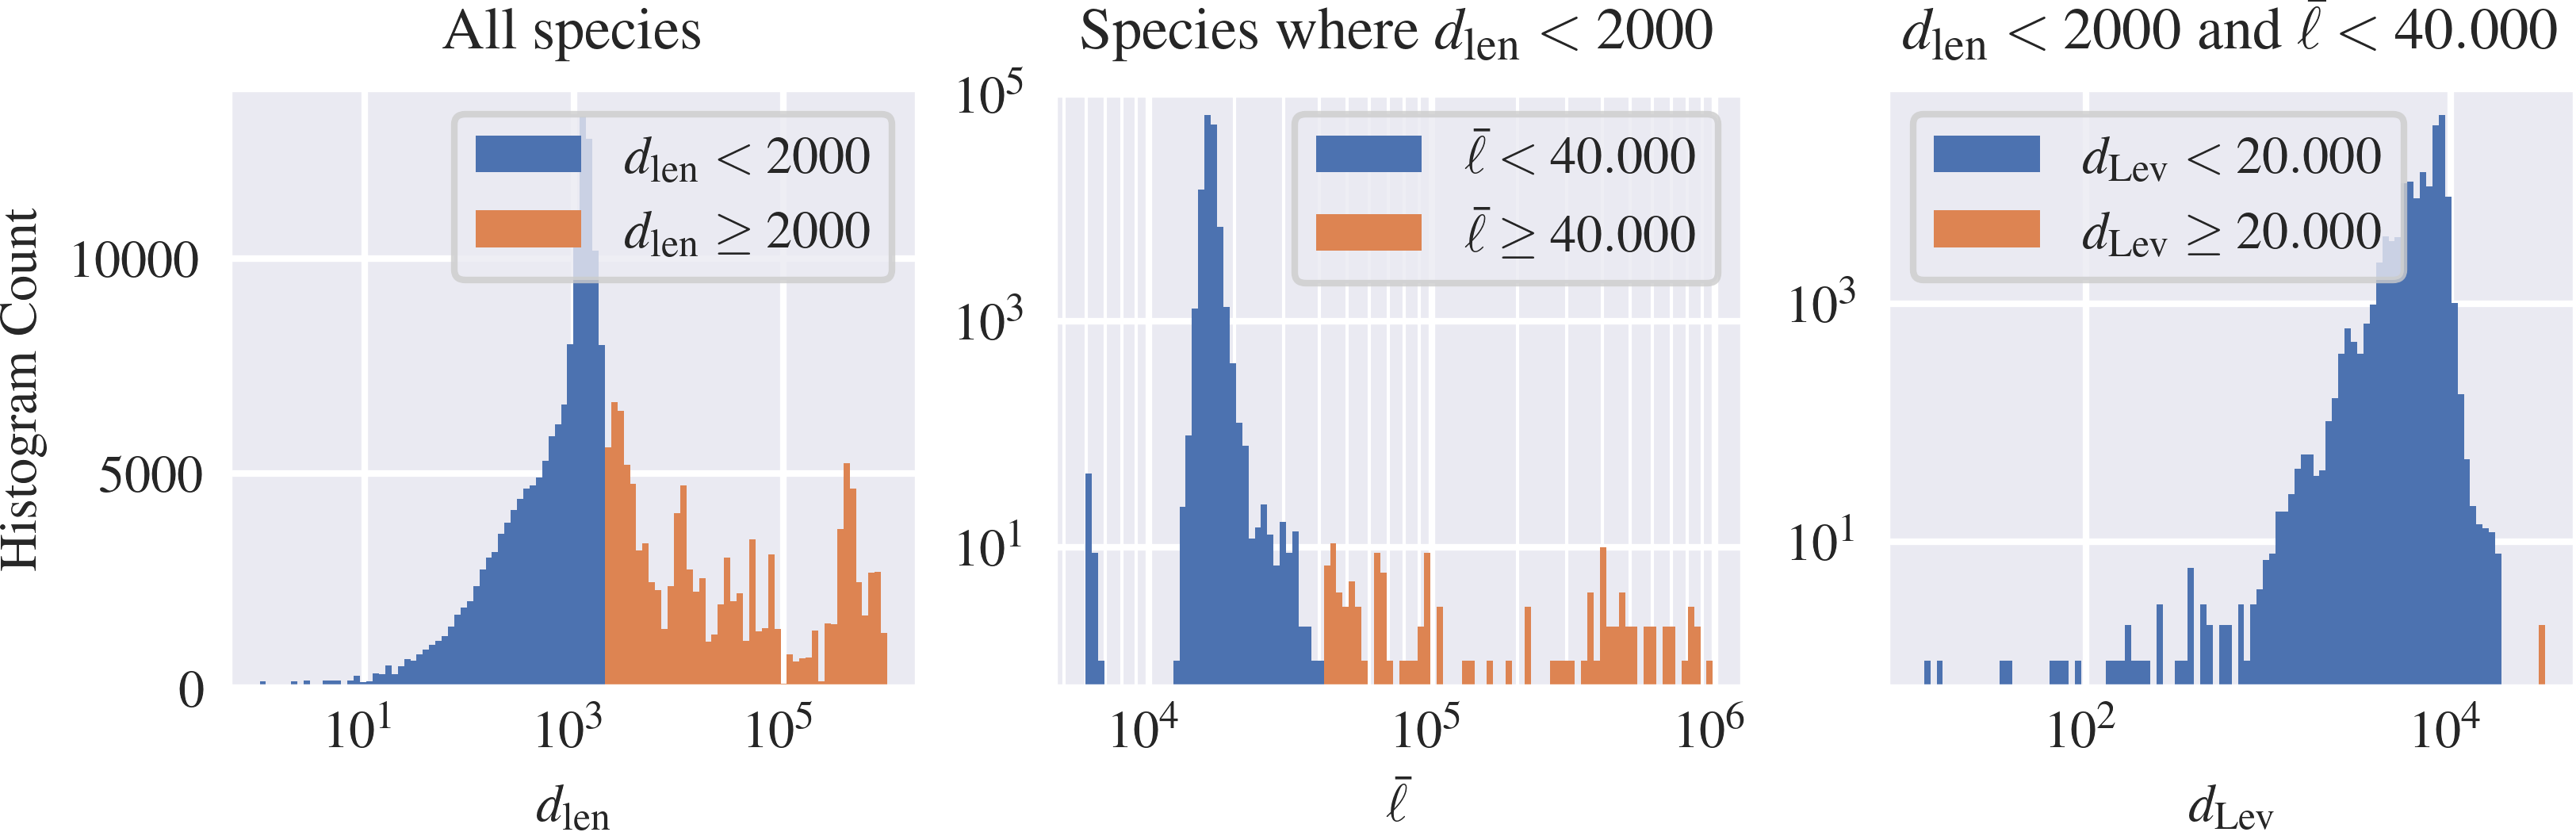

In [124]:
# - Plot histograms -
fig, ax = plt.subplots(1, 3, figsize=(W, W/(3/1)))

# Length-distance histogram
logbins = np.logspace(np.log10(bins1[0]), np.log10(bins1[-1]), len(bins1))
ax[0].hist(lens1[lens1 < 2000], bins=logbins, lw=0, label=r"$d_\mathrm{len} < 2000$")
ax[0].hist(lens1[lens1 >= 2000], bins=logbins, lw=0, label=r"$d_\mathrm{len} \geq 2000$")
ax[0].set_xscale('log')
ax[0].xaxis.grid(which='minor', lw=0.5)
ax[0].set_xlabel(r"$d_\mathrm{len}$")
ax[0].set_ylabel("Histogram Count")
ax[0].set_title("All species")
ax[0].legend()

# Sequence length histogram
logbins = np.logspace(np.log10(bins2[0]), np.log10(bins2[-1]), len(bins2))
ax[1].hist(lens2[lens2 < 40_000], bins=logbins, lw=0, label=r"$\bar \ell < 40.000$")
ax[1].hist(lens2[lens2 >= 40_000], bins=logbins, lw=0, label=r"$\bar \ell \geq 40.000$")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].xaxis.grid(which='minor', lw=0.5)
ax[1].yaxis.grid(which='minor', lw=0.5)
ax[1].set_xlabel(r"$\bar \ell$") # (a, b) := \frac{1}{2} \ell_a + \ell_b$")
ax[1].set_title(r"Species where $d_\mathrm{len} < 2000$")
ax[1].legend()

# Levenshtein distance histogram
logbins = np.logspace(np.log10(bins3[0]), np.log10(bins3[-1]), len(bins3))
ax[2].hist(levs[levs < 20_000], bins=logbins, lw=0, label=r"$d_\mathrm{Lev} < 20.000$")
ax[2].hist(levs[levs >= 20_000], bins=logbins, lw=0, label=r"$d_\mathrm{Lev} \geq 20.000$")
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].xaxis.grid(which='minor', lw=0.5)
ax[2].yaxis.grid(which='minor', lw=0.5)
ax[2].set_xlabel(r"$d_\mathrm{Lev}$")
ax[2].set_title(r"$d_\mathrm{len} < 2000$ and $\bar \ell < 40.000$")
ax[2].legend()

fig.savefig('doc/fig/hists.pdf')
plt.show()

## Figure 3

/var/folders/b_/mrq467b11bv_32fb0lz46bgm0000gp/T/ipykernel_69532/1606537457.py:3: RuntimeWarning: divide by zero encountered in log10
  K_len_log = np.log10(K_len)
/var/folders/b_/mrq467b11bv_32fb0lz46bgm0000gp/T/ipykernel_69532/1606537457.py:5: RuntimeWarning: divide by zero encountered in log10
  K_joint_log = np.log10(K_joint)
/var/folders/b_/mrq467b11bv_32fb0lz46bgm0000gp/T/ipykernel_69532/1606537457.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, cax=inset, orientation="horizontal", ticks=[0, K_len_log.max()], format='%.0f')
/var/folders/b_/mrq467b11bv_32fb0lz46bgm0000gp/T/ipykernel_69532/1606537457.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, cax=inset, orientati

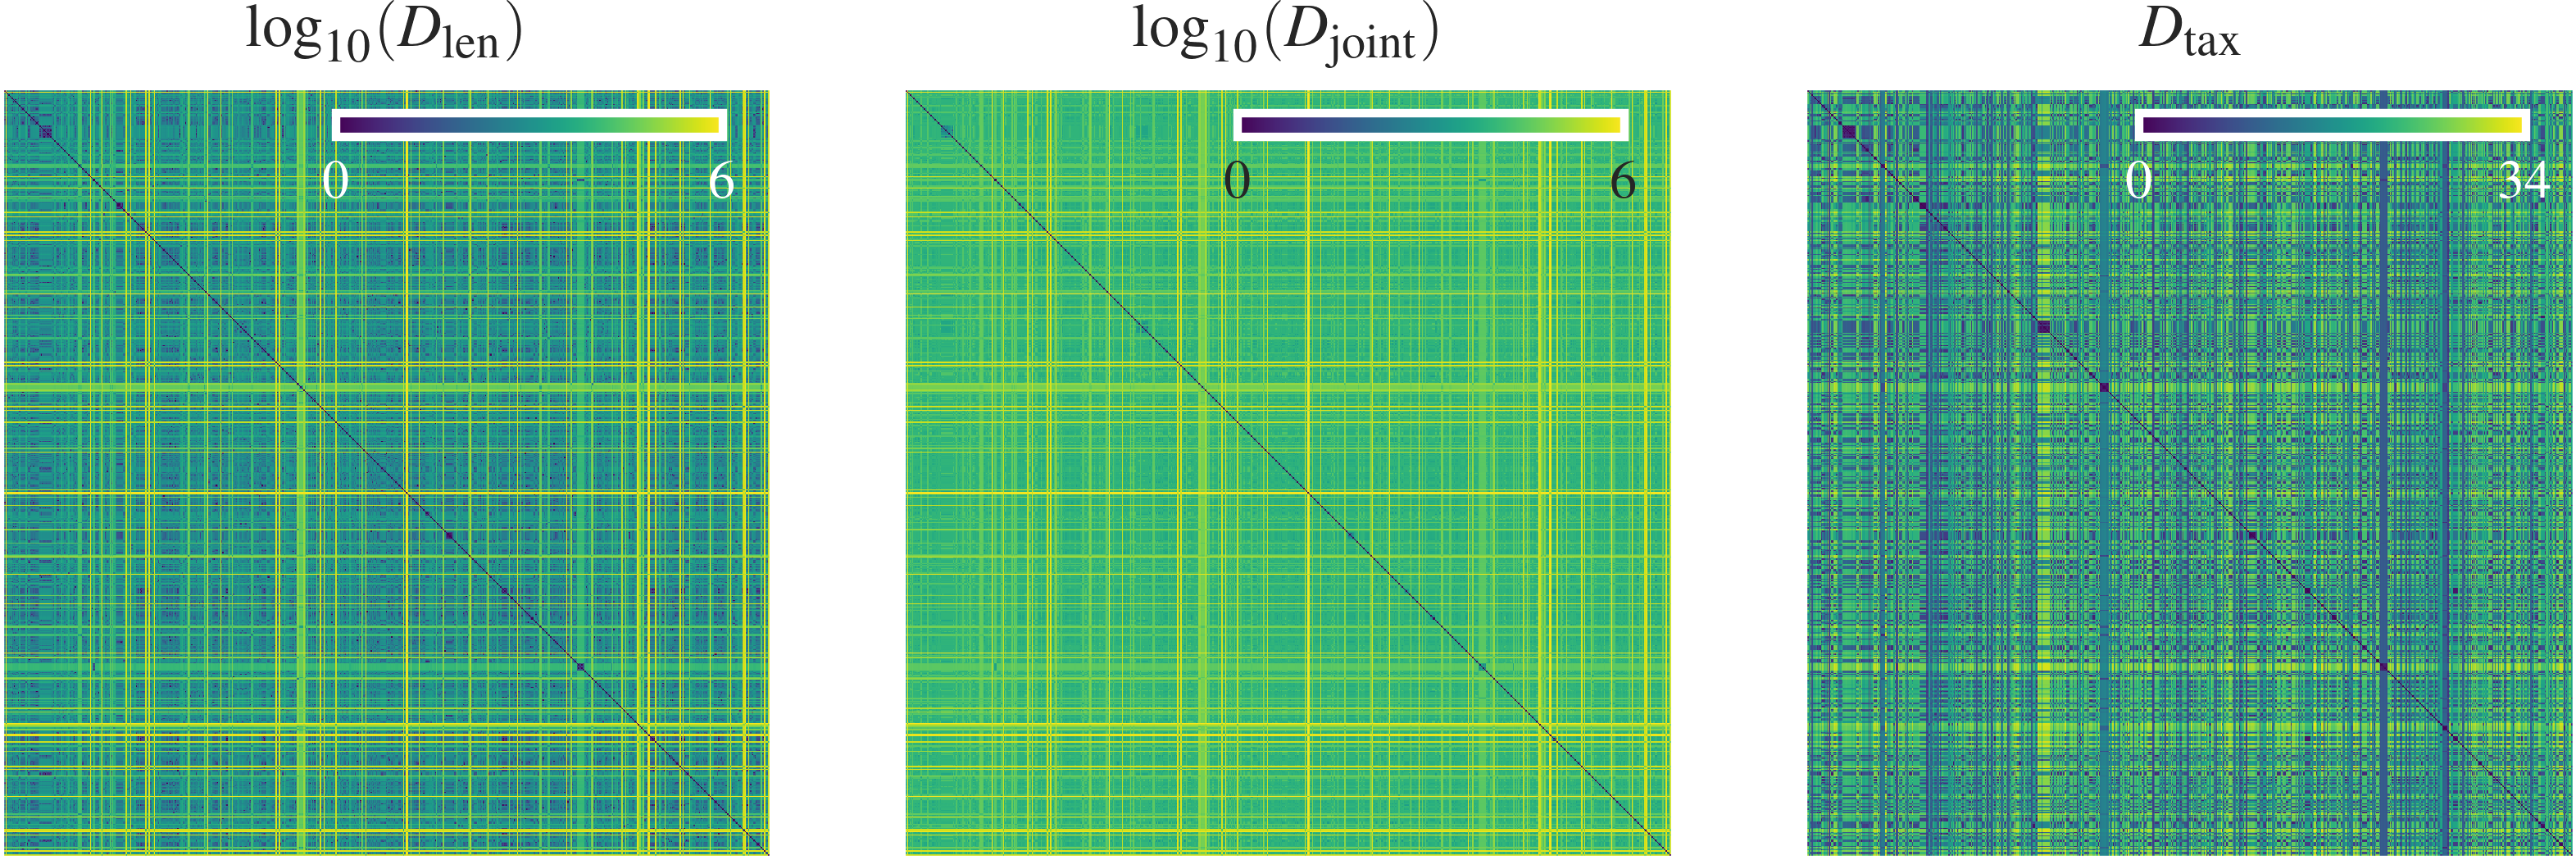

In [13]:
# Distance matrices
K_joint = np.where(~np.isnan(K_lev) & (K_lev < 20_000), K_lev, K_len + 20_000)
K_len_log = np.log10(K_len)
K_len_log[~np.isfinite(K_len_log)] = 0
K_joint_log = np.log10(K_joint)
K_joint_log[~np.isfinite(K_joint_log)] = 0

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(W, W/(3/1)))
ax[0].set_title("$\log_{10}(D_\mathrm{len})$")
ax[1].set_title("$\log_{10}(D_\mathrm{joint})$")
ax[2].set_title("$D_\mathrm{tax}$")

im = ax[0].imshow(K_len_log, cmap='viridis', interpolation='nearest')
inset = inset_axes(ax[0], width="50%", height="3%", loc='upper right',
                   bbox_to_anchor=(-0.03, 0, 1, 1), bbox_transform=ax[0].transAxes)
inset.tick_params(axis='x', colors='white')
fig.colorbar(im, cax=inset, orientation="horizontal", ticks=[0, K_len_log.max()], format='%.0f')

im = ax[1].imshow(K_joint_log, cmap='viridis', interpolation='nearest')
inset = inset_axes(ax[1], width="50%", height="3%", loc='upper right',
                   bbox_to_anchor=(-0.03, 0, 1, 1), bbox_transform=ax[1].transAxes)
fig.colorbar(im, cax=inset, orientation="horizontal", ticks=[0, K_joint_log.max()], format='%.0f')

im = ax[2].imshow(K_tax, cmap='viridis', interpolation='nearest')
inset = inset_axes(ax[2], width="50%", height="3%", loc='upper right',
                   bbox_to_anchor=(-0.03, 0, 1, 1), bbox_transform=ax[2].transAxes)
inset.tick_params(axis='x', colors='white')
fig.colorbar(im, cax=inset, orientation="horizontal", ticks=[0, K_tax.max()], format='%.0f')

for i in range(3):
    ax[i].grid(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.savefig('doc/fig/dist_matrices.pdf')
plt.show()

## Figure 1

In [26]:
def len_distance(a, b):
    return abs(len(a) - len(b))

# DNA sequences of test set species
dnas = [species[species.name == x].dna.iloc[0] for x in test]
taxs = [set(taxonomy[taxonomy.name == x].tax.iloc[0].split()) for x in test]

# Generate distance matrices on test set (takes about 10 minutes)
len_triu = []
lev_triu = []
for i, a in tqdm(enumerate(dnas), total=len(dnas)):
    for b in tqdm(dnas[i + 1:], leave=False):
        len_triu.append(len_distance(a, b))
        lev_triu.append(levenshtein(a, b))

# Generate taxonomy distance matrix on test set
tax_triu = []
for i, a in tqdm(enumerate(taxs), total=len(taxs)):
    for b in tqdm(taxs[i + 1:], leave=False):
        tax_triu.append(len(a) - len(a & b))

# Hierarchical clustering (average linkage)
Z_len = linkage(len_triu, 'average')
Z_lev = linkage(lev_triu, 'average')
Z_tax = linkage(tax_triu, 'average')

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

/Users/onno/Project/.venv/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:2869: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim([dvw, 0])


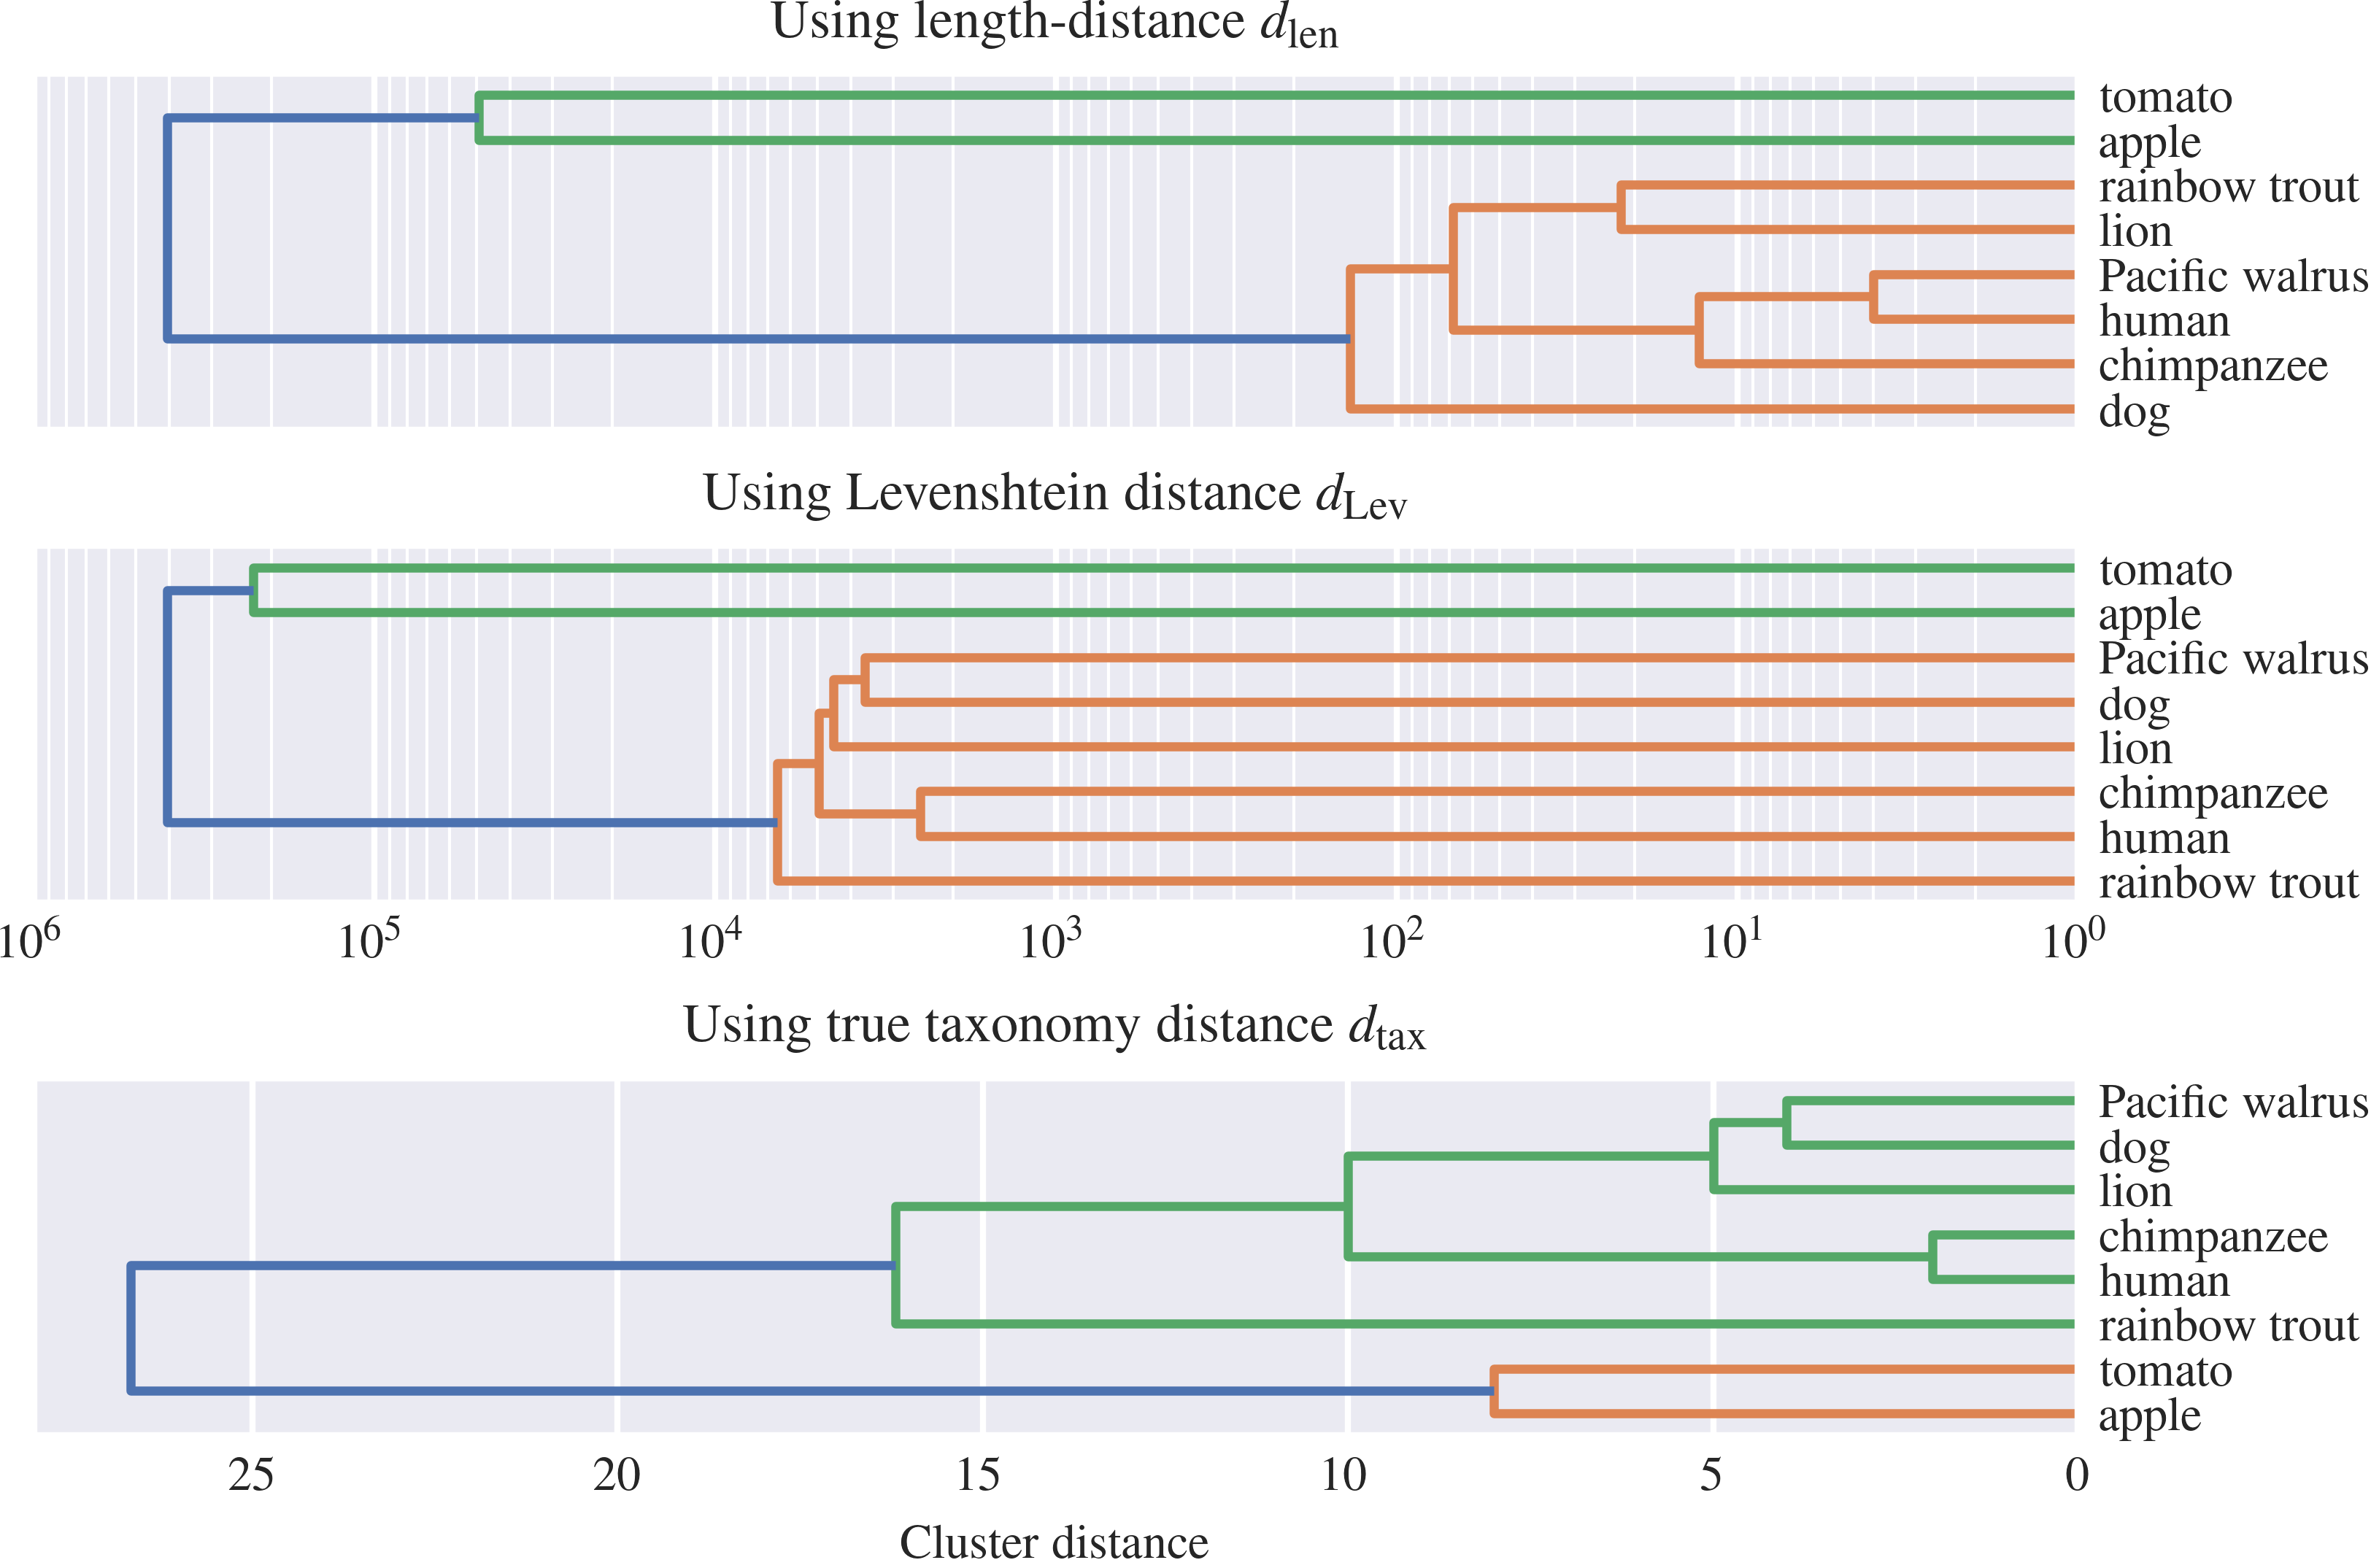

In [125]:
# Plot dendrograms
fig, ax = plt.subplots(3, 1)
ax[0].set_title('Using length-distance $d_\mathrm{len}$')
ax[1].set_title('Using Levenshtein distance $d_\mathrm{Lev}$')
ax[2].set_title('Using true taxonomy distance $d_\mathrm{tax}$')
ax[2].set_xlabel("Cluster distance")
# ax[1].set_xlabel("Cluster distance")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
dendrogram(Z_len, labels=test, ax=ax[0], orientation='left', leaf_font_size=8)
dendrogram(Z_lev, labels=test, ax=ax[1], orientation='left', leaf_font_size=8)
dendrogram(Z_tax, labels=test, ax=ax[2], orientation='left', leaf_font_size=8)
ax[0].set_xticks([1e6, 1e5, 1e4, 1e3, 1e2, 1e1, 1])
ax[1].set_xticks([1e6, 1e5, 1e4, 1e3, 1e2, 1e1, 1])
ax[0].set_xticklabels([])
ax[0].xaxis.grid(which='minor', lw=0.5)
ax[1].xaxis.grid(which='minor', lw=0.5)
ax[0].yaxis.grid(False)
ax[1].yaxis.grid(False)
ax[2].yaxis.grid(False)

fig.savefig('doc/fig/dendo_test.pdf')
plt.show()

## Figure 4

In [ ]:
# Generate taxonomy classes to show in plot
level = 0
distinct = [0] * 100
seen = [Counter() for _ in range(100)]
classes = [[] for _ in range(100)]
for t in taxonomy.tax:
    for i, a in enumerate(t.split()[::-1]):
        seen[i][a] += 1
        if seen[i][a] == 10:
            distinct[i] += 1
            classes[i].append(a)

            # We want to have primates as a class in our level
            if a == '9443':
                level = i

# Next step: check names of these classes at https://www.ncbi.nlm.nih.gov/Taxonomy/TaxIdentifier/tax_identifier.cgi

/Users/onno/Project/.venv/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:2869: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim([dvw, 0])
/Users/onno/Project/.venv/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:2869: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim([dvw, 0])


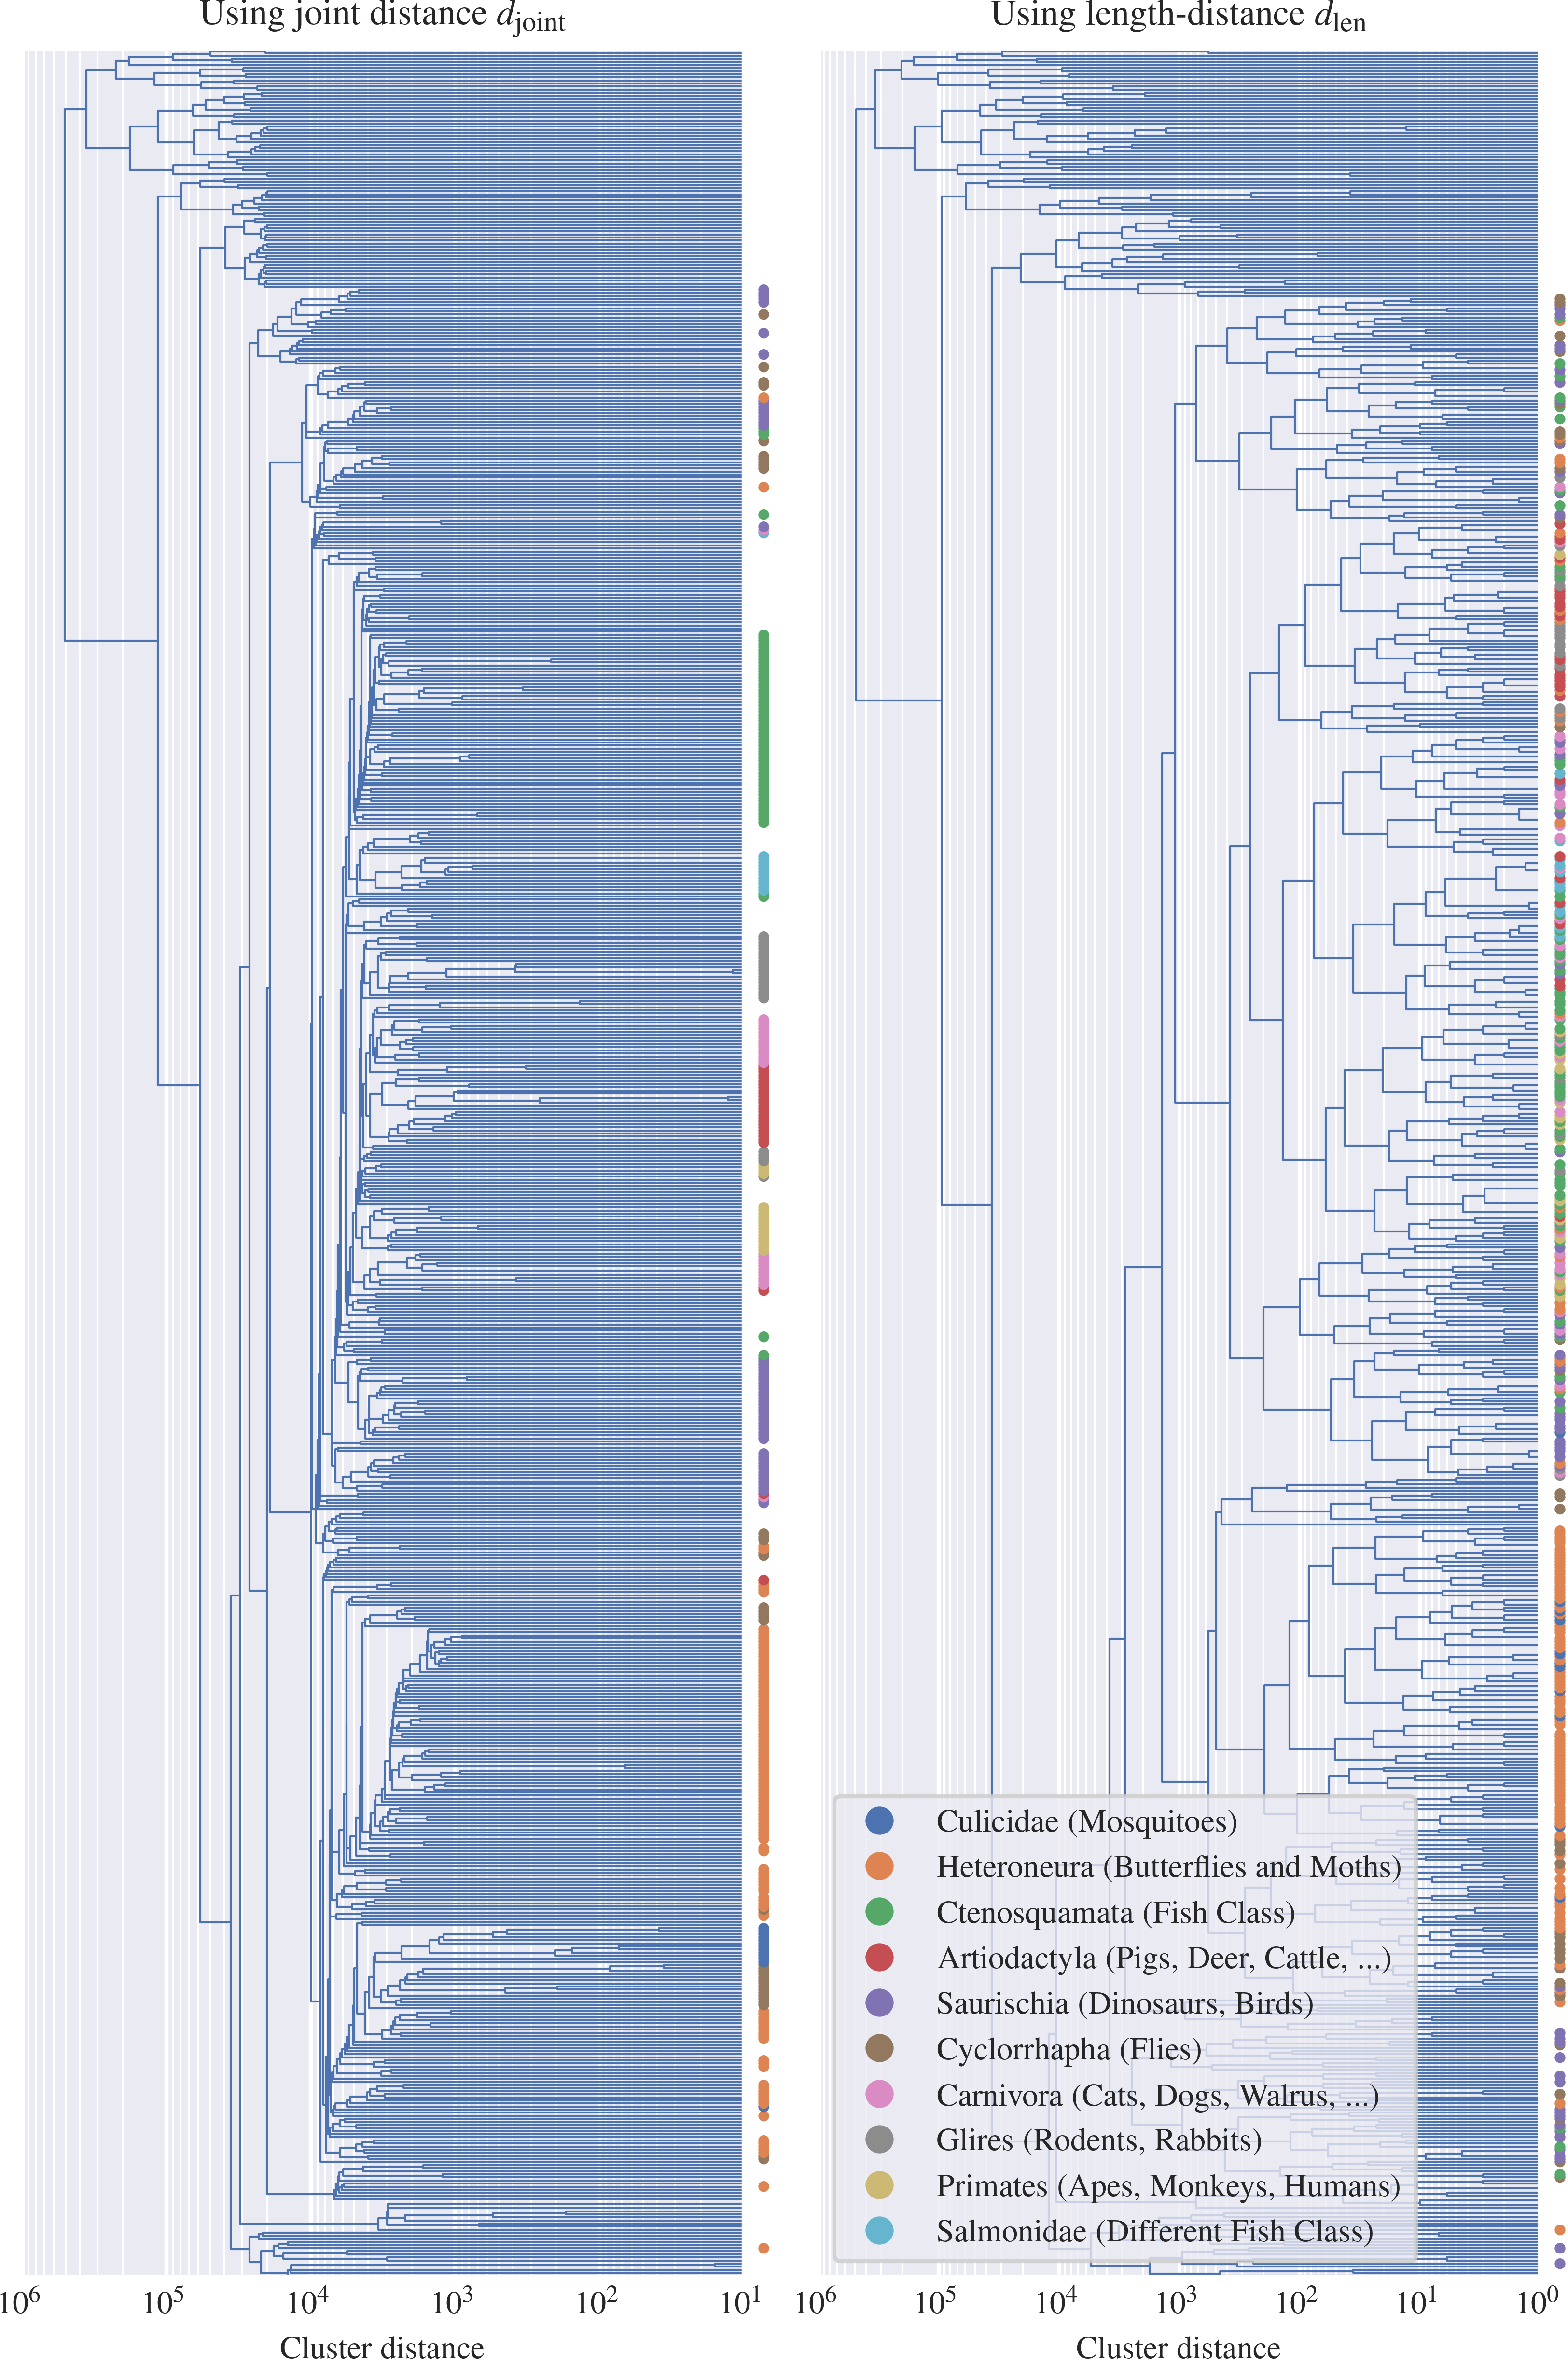

In [143]:
# -- Plot dendrograms --
fig, ax = plt.subplots(1, 2, figsize=(W, 1.5*W))
ax[0].set_title("Using joint distance $d_\mathrm{joint}$")
ax[1].set_title("Using length-distance $d_\mathrm{len}$")
ax[0].set_xlabel("Cluster distance")
ax[1].set_xlabel("Cluster distance")

# - Joint distance dendrogram -
Z = linkage(K_joint[np.triu_indices(len(K_joint), 1)], 'average')

a = ax[0]
a.set_xscale('log')
with plt.rc_context({'lines.linewidth': 0.5}):
    dendrogram(Z, orientation='left', color_threshold=0, leaf_font_size=10, ax=a)

# Put colored dots as labels to indicate class
labels = []
colors = []
for label in a.get_ymajorticklabels():
    taxes = taxonomy.tax[int(label.get_text())].split()
    if len(taxes) > level and taxes[-level - 1] in classes[level]:
        l = Text(*label.get_position(), '•')
        colors.append(classes[level].index(taxes[-level - 1]))
    else:
        l = Text('')
        colors.append(None)
    labels.append(l)
a.set_yticklabels(labels)
for i, label in enumerate(a.get_ymajorticklabels()):
    if label.get_text():
        label.set_color(f'C{colors[i]}')

a.set_xticks([1e6, 1e5, 1e4, 1e3, 1e2, 1e1])
a.xaxis.grid(which='minor', lw=0.5)
a.yaxis.grid(False)


# - Length-distance dendrogram -
Z = linkage(K_len[np.triu_indices(len(K_len), 1)], 'average')

a = ax[1]
a.set_xscale('log')
with plt.rc_context({'lines.linewidth': 0.5}):
    dendrogram(Z, orientation='left', color_threshold=0, leaf_font_size=10, ax=a)

# Put colored dots as labels to indicate class
labels = []
colors = []
for label in a.get_ymajorticklabels():
    taxes = taxonomy.tax[int(label.get_text())].split()
    if len(taxes) > level and taxes[-level - 1] in classes[level]:
        l = Text(*label.get_position(), '•')
        colors.append(classes[level].index(taxes[-level - 1]))
    else:
        l = Text('')
        colors.append(None)
    labels.append(l)
a.set_yticklabels(labels)
for i, label in enumerate(a.get_ymajorticklabels()):
    if label.get_text():
        label.set_color(f'C{colors[i]}')

a.set_xticks([1e6, 1e5, 1e4, 1e3, 1e2, 1e1, 1])
a.xaxis.grid(which='minor', lw=0.5)
a.yaxis.grid(False)


a.legend(handles=[
    Line2D([0], [0], lw=0, marker='o', color='C0', label='Culicidae (Mosquitoes)'),
    Line2D([0], [0], lw=0, marker='o', color='C1', label='Heteroneura (Butterflies and Moths)'),
    Line2D([0], [0], lw=0, marker='o', color='C2', label='Ctenosquamata (Fish Class)'),
    Line2D([0], [0], lw=0, marker='o', color='C3', label='Artiodactyla (Pigs, Deer, Cattle, ...)'),
    Line2D([0], [0], lw=0, marker='o', color='C4', label='Saurischia (Dinosaurs, Birds)'),
    Line2D([0], [0], lw=0, marker='o', color='C5', label='Cyclorrhapha (Flies)'),
    Line2D([0], [0], lw=0, marker='o', color='C6', label='Carnivora (Cats, Dogs, Walrus, ...)'),
    Line2D([0], [0], lw=0, marker='o', color='C7', label='Glires (Rodents, Rabbits)'),
    Line2D([0], [0], lw=0, marker='o', color='C8', label='Primates (Apes, Monkeys, Humans)'),
    Line2D([0], [0], lw=0, marker='o', color='C9', label='Salmonidae (Different Fish Class)')], loc='lower left')

fig.savefig("doc/fig/dendrogram.pdf")
plt.show()